<a href="https://colab.research.google.com/github/selene518/CohortAnalysis/blob/main/Transaction_Data_Based_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


# libarary

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

#import missingno as msno
#from textwrap import wrap

# Data loading and cleaning

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

#print(os.listdir('/content/gdrive/My Drive/'))

Mounted at /content/gdrive


In [ ]:
transaction_df = pd.read_excel('/content/gdrive/My Drive/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [ ]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [ ]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [ ]:
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


## Data Cleaning - Checking and working with missing value

In [ ]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None


### numerical variables

In [ ]:
# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())
# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
transaction_df = transaction_df.fillna(transaction_df.mean())
# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

1542
788


<ipython-input-10-be41ccc76f22>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  transaction_df = transaction_df.fillna(transaction_df.mean())


###Here, we can see that we have 1542 null values. Which we treated with mean as well as most frequent values as per datatype. Now, as we have completed our data cleaning and understanding, now we will commence the Cohort Analysis.

In [ ]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB
None


In [ ]:
 # group by -> count
 transaction_df['product_line'].value_counts().index[0]

'Standard'

In [ ]:
print(transaction_df.info())
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  float64
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB
None
0


# Join Tables:

### Import New Customer List and Check for missing values

In [ ]:
NewCustomerList_df = pd.read_excel('/content/gdrive/My Drive/KPMG_VI_New_raw_data_update_final.xlsx','NewCustomerList')
NewCustomerList_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.74375,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.72,0.7200,0.9000,0.76500,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.76,0.7600,0.7600,0.76000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.85,1.0625,1.0625,1.06250,4.0,4,1.703125


In [ ]:
NewCustomerList_df.columns = NewCustomerList_df.iloc[0]
NewCustomerList_df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.72,0.7200,0.900000,0.765000,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.76,0.7600,0.760000,0.760000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.85,1.0625,1.062500,1.062500,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,1.04,1.0400,1.040000,1.040000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.96,0.9600,1.200000,1.020000,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.97,1.2125,1.212500,1.030625,997.0,997,0.357


In [ ]:
NewCustomerList_df.drop(index=NewCustomerList_df.index[0], axis=0, inplace=True)
NewCustomerList_df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.72,0.7200,0.900000,0.765000,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.76,0.7600,0.760000,0.760000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.85,1.0625,1.062500,1.062500,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.54,0.5400,0.675000,0.675000,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,1.04,1.0400,1.040000,1.040000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.96,0.9600,1.200000,1.020000,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.97,1.2125,1.212500,1.030625,997.0,997,0.357


In [ ]:
NewCustomerList_df.describe()

,NaN,NaN,NaN,NaN,NaN
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.748650,0.839307,0.943800,0.871340,498.749000
std,0.203619,0.242122,0.289556,0.274851,288.800127
min,0.400000,0.400000,0.400000,0.340000,1.000000
25%,0.577500,0.637500,0.712500,0.640625,250.000000
50%,0.740000,0.825000,0.930000,0.859687,500.000000
75%,0.930000,1.030000,1.150000,1.073594,750.250000
max,1.100000,1.375000,1.718750,1.718750,1000.000000


In [ ]:
print(NewCustomerList_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                       

In [ ]:
print(NewCustomerList_df.isnull().values.sum())
print(NewCustomerList_df['last_name'].mode()[0])
print(NewCustomerList_df['DOB'].mode()[0])
print(NewCustomerList_df['job_title'].mode()[0])
print(NewCustomerList_df['job_industry_category'].mode()[0])


317
Borsi
1941-07-21
Associate Professor
Financial Services


In [ ]:
NewCustomerList_df['last_name'].fillna('Borsi', inplace=True)
NewCustomerList_df['DOB'].fillna('1941-07-21', inplace=True)
NewCustomerList_df['job_title'].fillna('Associate Professor', inplace=True)
NewCustomerList_df['job_industry_category'].fillna('Financial Services', inplace=True)
print(NewCustomerList_df.isnull().values.sum())

0


### Import Customer Demographic and Check for missing values

In [ ]:
CustomerDemographic_df = pd.read_excel('/content/gdrive/My Drive/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
CustomerDemographic_df.head()

<ipython-input-35-9208e0cc4e98>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic_df = pd.read_excel('/content/gdrive/My Drive/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')


,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,#NUM!,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaT,124,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaT,124,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaT,124,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaT,124,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
CustomerDemographic_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [ ]:
print(CustomerDemographic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   object        
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
print(CustomerDemographic_df.isnull().values.sum())
print(CustomerDemographic_df['DOB'].mode()[0])
print(CustomerDemographic_df['job_title'].mode()[0])
print(CustomerDemographic_df['job_industry_category'].mode()[0])
print(CustomerDemographic_df['tenure'].median())

1336
1978-01-30 00:00:00
Business Systems Development Analyst
Manufacturing
11.0


In [ ]:
CustomerDemographic_df['DOB'].fillna('1978-01-30 00:00:00', inplace=True)
CustomerDemographic_df['job_title'].fillna('Business Systems Development Analyst', inplace=True)
CustomerDemographic_df['job_industry_category'].fillna('Manufacturing', inplace=True)
CustomerDemographic_df['tenure'].fillna('median', inplace=True)
print(CustomerDemographic_df.isnull().values.sum())

0


### Import Customer Address and Check for missing values

In [ ]:
CustomerAddress_df = pd.read_excel('/content/gdrive/My Drive/KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')
CustomerAddress_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [ ]:
CustomerAddress_df.columns = CustomerAddress_df.iloc[0]
CustomerAddress_df

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
CustomerAddress_df.drop(index=CustomerAddress_df.index[0], axis=0, inplace=True)
CustomerAddress_df

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
CustomerAddress_df.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [ ]:
print(CustomerAddress_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB
None


In [ ]:
print(CustomerAddress_df.isnull().values.sum())

0


## Join 3 Tables

In [ ]:
df1 = pd.merge(CustomerDemographic_df, CustomerAddress_df, how = 'inner', on ='customer_id')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3996 non-null   object        
 1   name                                 3996 non-null   object        
 2   gender                               3996 non-null   object        
 3   past_3_years_bike_related_purchases  3996 non-null   int64         
 4   DOB                                  3996 non-null   datetime64[ns]
 5   age                                  3996 non-null   object        
 6   job_title                            3996 non-null   object        
 7   job_industry_category                3996 non-null   object        
 8   wealth_segment                       3996 non-null   object        
 9   deceased_indicator                   3996 non-null   object        
 10  owns_car    

In [ ]:
df1['past_3_years_bike_related_purchases'] = NewCustomerList_df['past_3_years_bike_related_purchases'].astype(object)
df1['DOB'] = NewCustomerList_df['DOB'].astype(object)
df2 = pd.merge(df1, NewCustomerList_df, how = 'inner', on = ['gender','DOB'])
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 508
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            509 non-null    object 
 1   name                                   509 non-null    object 
 2   gender                                 509 non-null    object 
 3   past_3_years_bike_related_purchases_x  509 non-null    object 
 4   DOB                                    509 non-null    object 
 5   age                                    509 non-null    object 
 6   job_title_x                            509 non-null    object 
 7   job_industry_category_x                509 non-null    object 
 8   wealth_segment_x                       509 non-null    object 
 9   deceased_indicator_x                   509 non-null    object 
 10  owns_car_x                             509 non-null    object 
 11  tenure

,customer_id,name,gender,past_3_years_bike_related_purchases_x,DOB,age,job_title_x,job_industry_category_x,wealth_segment_x,deceased_indicator_x,...,state_y,country_y,property_valuation_y,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,2854,Vikky Dyde,U,5,1941-07-21,124,Project Manager,IT,High Net Worth,N,...,VIC,Australia,5,0.73,0.7300,0.730000,0.620500,57.0,57,1.375
1,2854,Vikky Dyde,U,5,1941-07-21,124,Project Manager,IT,High Net Worth,N,...,NSW,Australia,9,0.53,0.6625,0.828125,0.828125,226.0,226,1.1125
2,2854,Vikky Dyde,U,5,1941-07-21,124,Project Manager,IT,High Net Worth,N,...,VIC,Australia,3,0.59,0.7375,0.737500,0.626875,324.0,324,1.01
3,2854,Vikky Dyde,U,5,1941-07-21,124,Project Manager,IT,High Net Worth,N,...,QLD,Australia,8,0.41,0.4100,0.410000,0.410000,358.0,358,0.98
4,2854,Vikky Dyde,U,5,1941-07-21,124,Project Manager,IT,High Net Worth,N,...,VIC,Australia,7,0.40,0.5000,0.500000,0.425000,361.0,361,0.9775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1877,Radcliffe Bartolomeoni,Male,44,1997-10-23,57,Associate Professor,Financial Services,High Net Worth,N,...,NSW,Australia,10,0.75,0.9375,1.171875,1.171875,725.0,725,0.669375
505,2192,Hubie Leipold,Male,59,1974-05-15,57,Staff Accountant II,Manufacturing,Mass Customer,N,...,VIC,Australia,3,0.70,0.8750,0.875000,0.743750,988.0,988,0.3995
506,2270,Augustus Edleston,Male,38,1959-07-13,57,Information Systems Manager,Retail,Affluent Customer,N,...,NSW,Australia,4,0.56,0.7000,0.700000,0.595000,994.0,994,0.3825
507,2324,Jerrold Robben,Male,22,2001-10-17,57,Sales Associate,Manufacturing,Mass Customer,N,...,NSW,Australia,10,0.96,0.9600,1.200000,1.020000,997.0,997,0.357


In [ ]:
df3 = pd.merge(transaction_df, df2, how = 'left', on ='customer_id')
df3['age'] = df3['age'].replace('#NUM!', np.nan)
df3.info()
df3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20099 entries, 0 to 20098
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   transaction_id                         20099 non-null  int64         
 1   product_id                             20099 non-null  int64         
 2   customer_id                            20099 non-null  object        
 3   transaction_date                       20099 non-null  datetime64[ns]
 4   online_order                           20099 non-null  object        
 5   order_status                           20099 non-null  object        
 6   brand                                  20099 non-null  object        
 7   product_line                           20099 non-null  object        
 8   product_class                          20099 non-null  object        
 9   product_size                           20099 non-null  object

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,state_y,country_y,property_valuation_y,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,QLD,Australia,7,0.40,0.40,0.40,0.3400,181.0,181,1.158125
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,NSW,Australia,11,0.52,0.52,0.65,0.5525,644.0,644,0.730469
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20094,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20095,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20096,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20097,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA:


<ipython-input-49-b09c6c78b57c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['list_price'].astype(float), hist=True, kde=False, bins = 8, color = 'blue', hist_kws={'edgecolor':'black'})


Text(0, 0.5, 'Count')

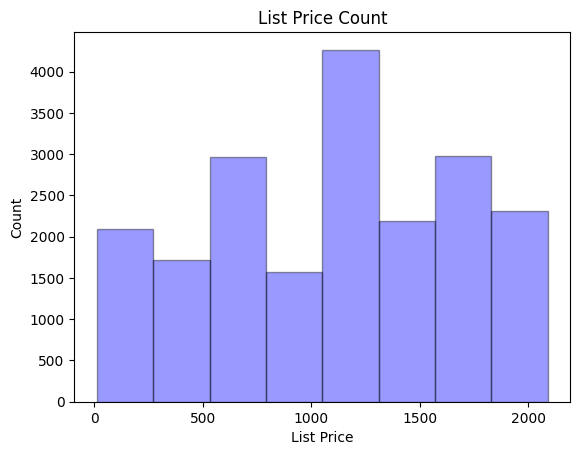

In [ ]:
df3['list_price'] = pd.to_numeric(df3['list_price'], errors='coerce')
sns.distplot(df3['list_price'].astype(float), hist=True, kde=False, bins = 8, color = 'blue', hist_kws={'edgecolor':'black'})
plt.title('List Price Count')
plt.xlabel('List Price')
plt.ylabel('Count')

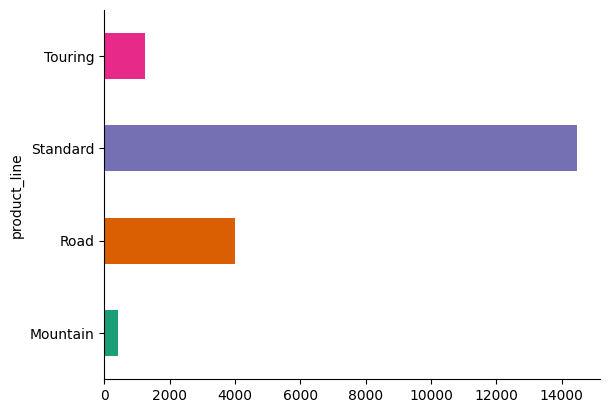

In [ ]:
df3.groupby('product_line').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

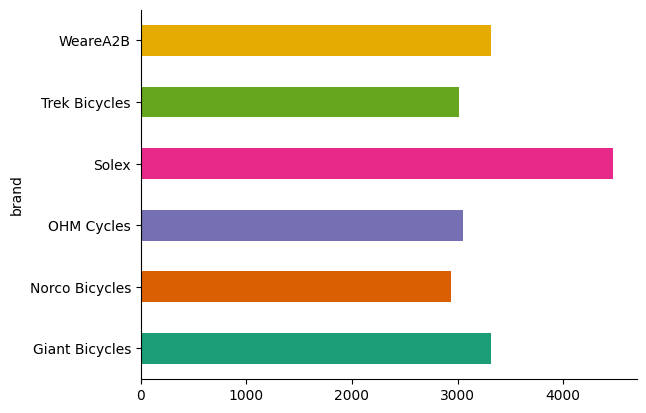

In [ ]:
df3.groupby('brand').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

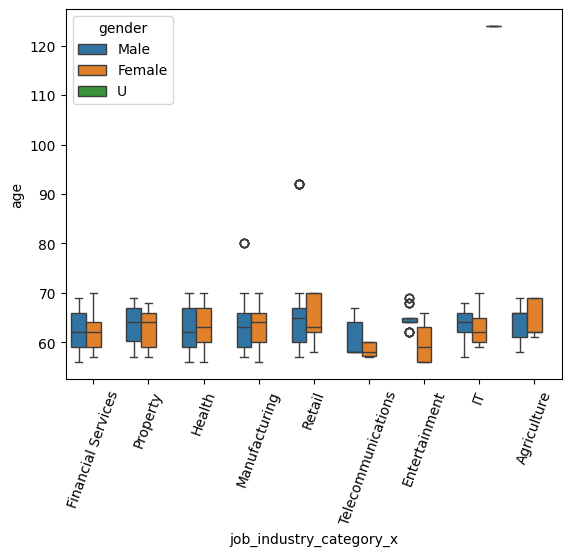

In [ ]:
df3['age'] = pd.to_numeric(df3['age'])
sns.boxplot(y='age', x='job_industry_category_x', data=df3, hue='gender')
plt.xticks(rotation=70)
plt.show()


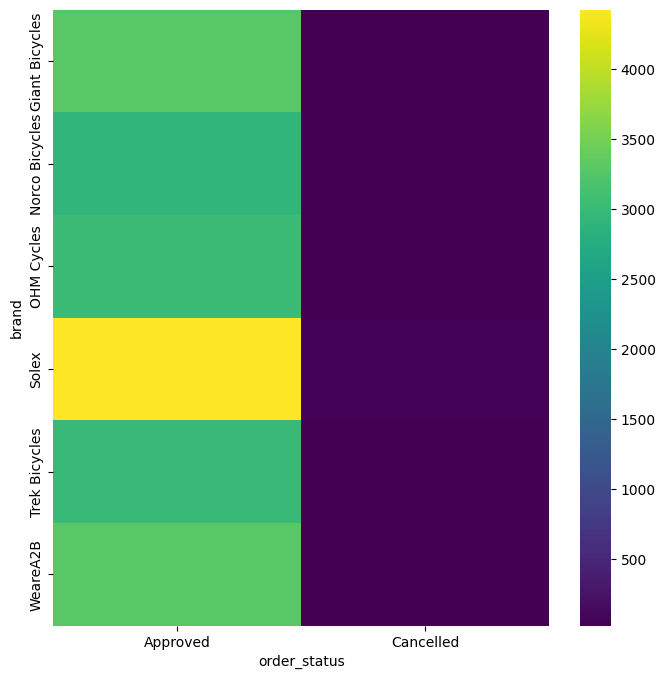

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['brand'].value_counts()
    for x_label, grp in df3.groupby('order_status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('order_status')
_ = plt.ylabel('brand')

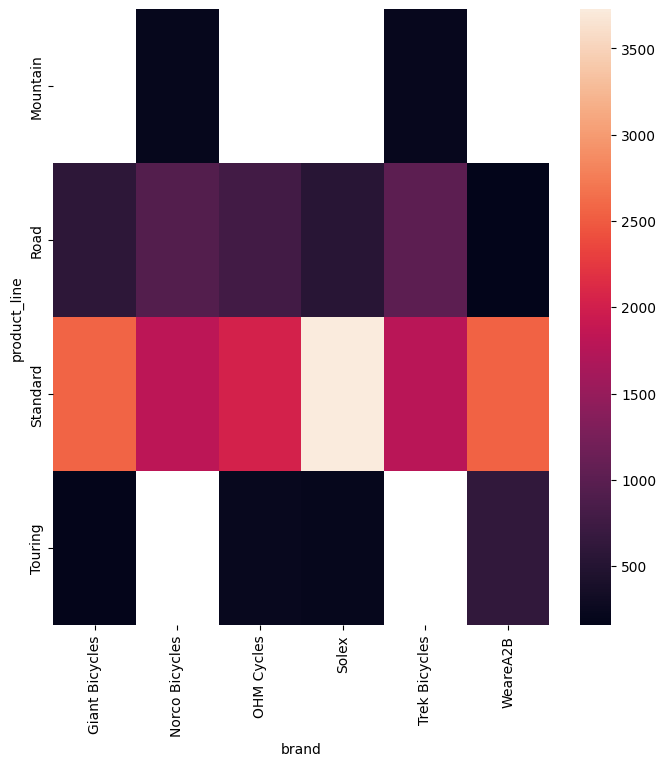

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_line'].value_counts()
    for x_label, grp in df3.groupby('brand')
})
sns.heatmap(df_2dhist)
plt.xlabel('brand')
_ = plt.ylabel('product_line')

# Cohort Analysis

In [ ]:
print(df3.info())
df3['product_line'].value_counts().index[0]
for col in df3.columns:
    if df3[col].dtypes == 'object':
        df3[col] = df3[col].fillna(df3[col].value_counts().index[0])
print(df3.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20099 entries, 0 to 20098
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   transaction_id                         20099 non-null  int64         
 1   product_id                             20099 non-null  int64         
 2   customer_id                            20099 non-null  object        
 3   transaction_date                       20099 non-null  datetime64[ns]
 4   online_order                           20099 non-null  object        
 5   order_status                           20099 non-null  object        
 6   brand                                  20099 non-null  object        
 7   product_line                           20099 non-null  object        
 8   product_class                          20099 non-null  object        
 9   product_size                           20099 non-null  object

# Assigned the cohorts and calculated the monthly offset

In [ ]:
dt.datetime(df3['transaction_date'][1].year, df3['transaction_date'][1].month, 1)
df3

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,state_y,country_y,property_valuation_y,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,QLD,Australia,7,0.40,0.40,0.40,0.3400,181.0,181,1.158125
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,NSW,Australia,11,0.52,0.52,0.65,0.5525,644.0,644,0.730469
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20094,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
20095,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
20096,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
20097,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125


In [ ]:
# A function that will parse the date Time based cohort: 1 day of month
def get_month(date):
  if isinstance(date, str):
    return dt.datetime.strptime(date, '%Y-%m-%d').date().replace(day=1)
  elif isinstance(date, dt.datetime):
    return date.date().replace(day=1)
  else:
    raise TypeError("Invalid date format")
# Create transaction_date column based on month and store in TransactionMonth
df3['TransactionMonth'] = df3['transaction_date'].apply(get_month)
df3

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,state_y,country_y,property_valuation_y,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,QLD,Australia,7,0.40,0.40,0.40,0.3400,181.0,181,1.158125
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,NSW,Australia,11,0.52,0.52,0.65,0.5525,644.0,644,0.730469
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20094,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
20095,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
20096,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
20097,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125


In [ ]:
df3['TransactionMonth'] = pd.to_datetime(df3['TransactionMonth'])
df3.groupby('customer_id')['TransactionMonth'].min()

customer_id
1      2017-01-01
2      2017-05-01
3      2017-02-01
4      2017-04-01
5      2017-03-01
          ...    
3497   2017-09-01
3498   2017-02-01
3499   2017-01-01
3500   2017-01-01
5034   2017-01-01
Name: TransactionMonth, Length: 3494, dtype: datetime64[ns]

In [ ]:
df3.groupby('customer_id')['TransactionMonth'].transform('min')

0       2017-02-01
1       2017-01-01
2       2017-01-01
3       2017-02-01
4       2017-01-01
           ...    
20094   2017-01-01
20095   2017-01-01
20096   2017-04-01
20097   2017-02-01
20098   2017-03-01
Name: TransactionMonth, Length: 20099, dtype: datetime64[ns]

In [ ]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
df3['CohortMonth'] = df3.groupby('customer_id')['TransactionMonth'].transform('min')
print(df3.head())

   transaction_id  product_id  customer_id transaction_date online_order  \
0               1           2         2950       2017-02-25        False   
1               2           3         3120       2017-05-21         True   
2               3          37          402       2017-10-16        False   
3               4          88         3135       2017-08-31        False   
4               5          78          787       2017-10-01         True   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

   state_y  country_y  property_valuation_y   NaN   NaN   NaN     Na

## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [ ]:
df3['TransactionMonth'] = pd.to_datetime(df3['TransactionMonth'])
df3['CohortMonth'] = pd.to_datetime(df3['CohortMonth'])
# Getting the integers for date parts from the `InvoiceDay` column
tanscation_year, transaction_month, _ = get_date_int(df3, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(df3, 'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [ ]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
df3['CohortIndex'] = years_diff * 12 + months_diff  + 1
df3.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,state_y,country_y,property_valuation_y,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,QLD,Australia,7,0.40,0.40,0.40,0.3400,181.0,181,1.158125
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,NSW,Australia,11,0.52,0.52,0.65,0.5525,644.0,644,0.730469
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,NSW,Australia,9,NaN,NaN,NaN,NaN,NaN,345,0.988125


In [ ]:
df4 = df3[(df3['CohortMonth'] == '2017-07-01') & (df3['CohortIndex'] == 5)]
df5 = df3[(df3['CohortMonth'] == '2017-07-01') & (df3['CohortIndex'] == 6)]
df4.merge(df5, how ='left', on = 'customer_id')


Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [ ]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = df3.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1.0,1350
1,2017-01-01,2.0,486
2,2017-01-01,3.0,508
3,2017-01-01,4.0,505
4,2017-01-01,5.0,500


# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [ ]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
CohortMonth,,,,,,,,,,,,
2017-01-01,1350.0,486.0,508.0,505.0,500.0,480.0,513.0,527.0,498.0,531.0,495.0,515.0
2017-02-01,797.0,325.0,296.0,311.0,288.0,297.0,308.0,279.0,327.0,308.0,296.0,NaN
2017-03-01,482.0,166.0,174.0,167.0,181.0,184.0,171.0,212.0,188.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,142.0,121.0,141.0,125.0,132.0,NaN,NaN,NaN
2017-05-01,209.0,85.0,81.0,87.0,71.0,74.0,73.0,80.0,NaN,NaN,NaN,NaN
2017-06-01,121.0,45.0,44.0,47.0,46.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,31.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,36.0,37.6,37.4,37.0,35.6,38.0,39.0,36.9,39.3,36.7,38.1
2017-02-01,100.0,40.8,37.1,39.0,36.1,37.3,38.6,35.0,41.0,38.6,37.1,NaN
2017-03-01,100.0,34.4,36.1,34.6,37.6,38.2,35.5,44.0,39.0,37.6,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.3,36.0,42.0,37.2,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.7,38.8,41.6,34.0,35.4,34.9,38.3,NaN,NaN,NaN,NaN
2017-06-01,100.0,37.2,36.4,38.8,38.0,38.0,43.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,40.3,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

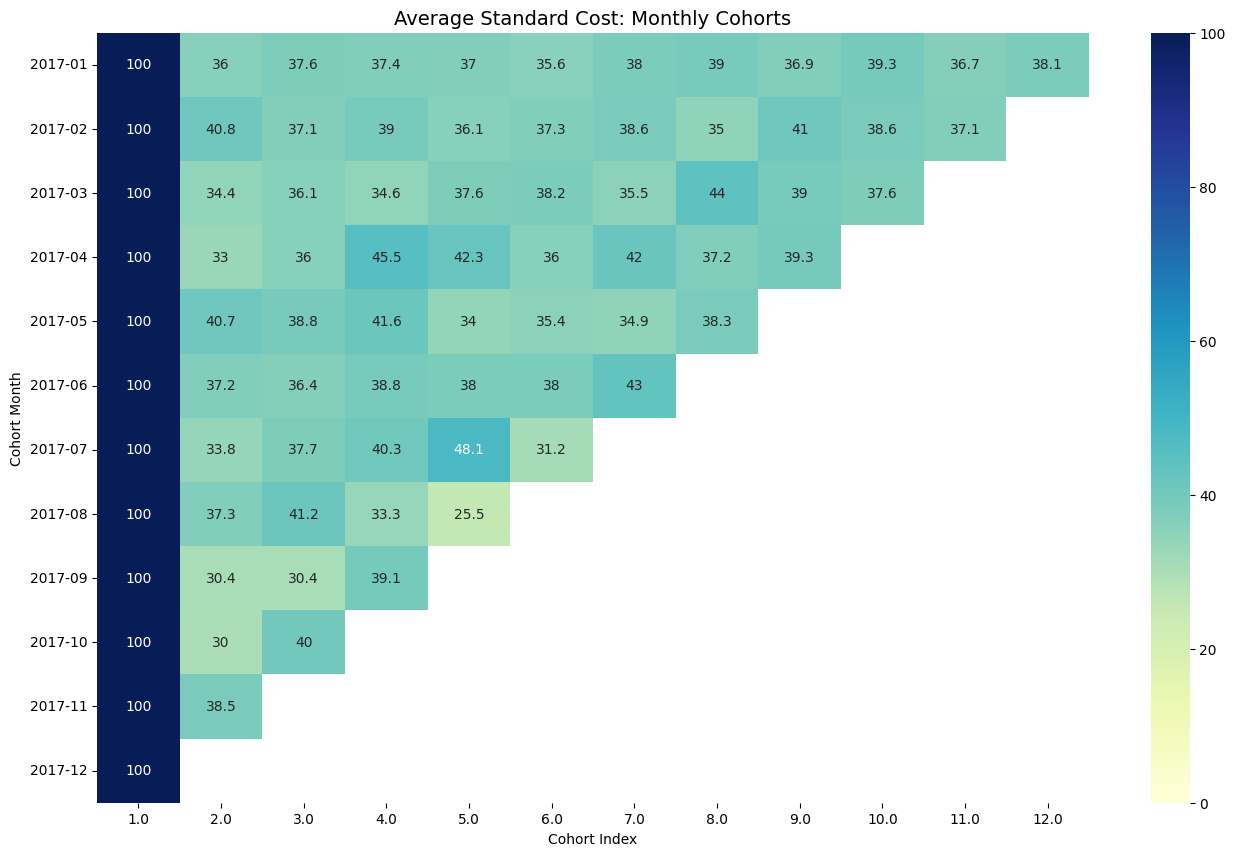

In [ ]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
plt.figure(figsize=(16, 10))
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='horizontal')
plt.show()


*   Customers who made an order on the 1st month dropped significantly over time, retention rate dropped more than 60% after the 1st month.

*   The biggest drop of customers happened in July cohort group. Only 31.2% of
customers are retained after the 5th month since they bought the products.

*  Customers who are in cohort 2017-01, 2017-03, 2017-04, 2017-06, 2017-09, 2017-10 had higher percentage customers retained than the percentage in the first month after they purchased the products.

*  The % of customers retained after the 3rd month is the highest since the first month.

*  The highest % of customers retained happend in cohort 2017-07 after the 5th month since the 1st month.












# Root Cause Analysis


In [ ]:
df6 = pd.merge(transaction_df, CustomerDemographic_df, how = 'inner', on ='customer_id')
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19997 non-null  object        
 5   order_status                         19997 non-null  object        
 6   brand                                19997 non-null  object        
 7   product_line                         19997 non-null  object        
 8   product_class                        19997 non-null  object        
 9   product_size                         19997 non-null  object        
 10  list_price

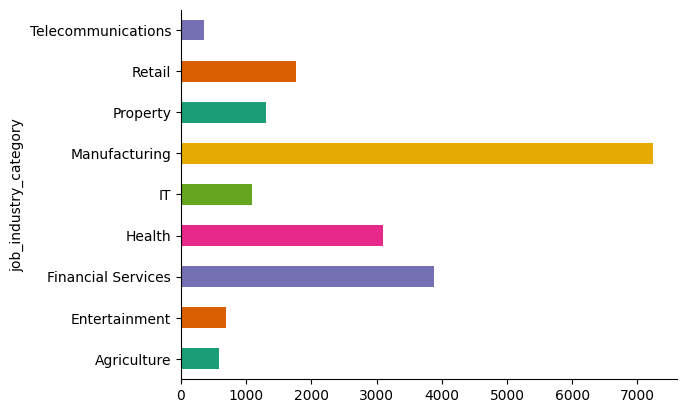

In [ ]:
df6.groupby('job_industry_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Seniors: [69.0, 69.0, 69.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 69.0, 69.0, 69.0, 69.0, 69.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 69.0, 69.0, 69.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 69.0, 69.0, 69.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 67.0, 67.0, 67.0, 67.0, 67.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 

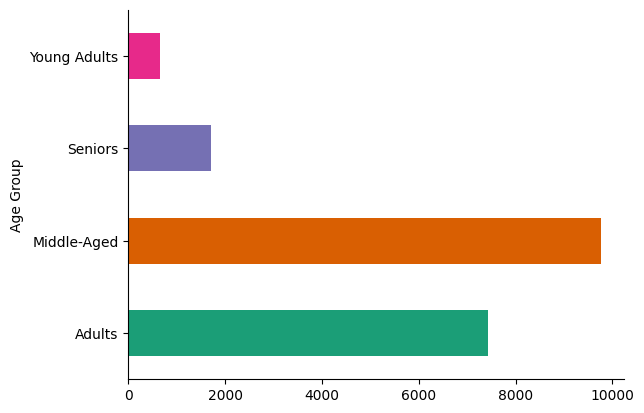

In [ ]:
df6['age'] = pd.to_numeric(df6['age'], errors='coerce')

groups = {
    "Young Adults": (18, 24),
    "Adults": (25, 44),
    "Middle-Aged": (45, 64),
    "Seniors": (65, 100)
}

grouped_ages = {}
for age in df6['age']:
    for group_name, (min_age, max_age) in groups.items():
        if min_age <= age <= max_age:
            grouped_ages.setdefault(group_name, []).append(age)
            break
for group_name, ages in grouped_ages.items():
    print(f"{group_name}: {ages}")

df6['Age Group'] = np.nan
for group_name, ages in grouped_ages.items():
    df6.loc[df6['age'].isin(ages), 'Age Group'] = group_name

df6.groupby('Age Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

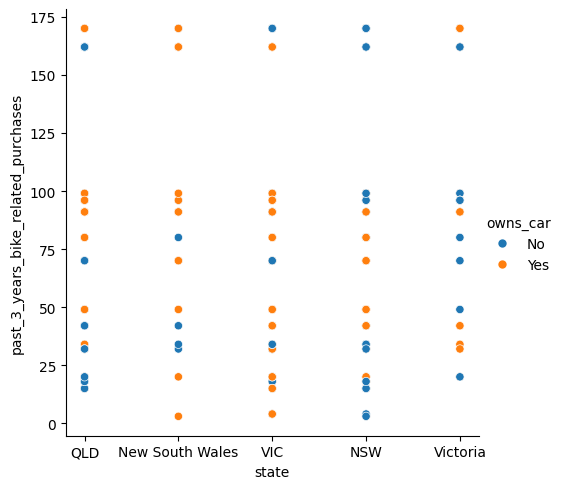

In [ ]:
df1['past_3_years_bike_related_purchases'] = df1.groupby('past_3_years_bike_related_purchases')['past_3_years_bike_related_purchases'].transform('count')
sns.relplot(data=df1, x="state", y="past_3_years_bike_related_purchases", hue="owns_car")
plt.show()

*   Most profits are generated by customers who are in the middle age group with age above 40. These users could be the target users.
*   Customers who generated most profits are working in manufacutring, financial services, and health industry.
*   Customers who keep purchasing after 1st month are those who don't have cars in New South Wales and Victoria states.






# RFM Model

In [ ]:
df_recency = df3.groupby(by=['name'],
                        as_index=False)['CohortMonth'].min()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency

,CustomerName,LastPurchaseDate,Recency
0,Abe Ealam,2017-06-01,153
1,Adolphus Seers,2017-05-01,184
2,Adrea Quittonden,2017-06-01,153
3,Adrian Prettyjohns,2017-02-01,273
4,Aharon Moller,2017-04-01,214
...,...,...,...
416,Yorker McKevany,2017-02-01,273
417,Yovonnda Warrior,2017-08-01,92
418,Zacherie Grindley,2017-02-01,273
419,Zachery Hamber,2017-01-01,304


In [ ]:
frequency_df = df6.drop_duplicates().groupby(
    by=['name'], as_index=False)['TransactionMonth'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,Aarika Magog,6
1,Aarika Van Vuuren,3
2,Abagail Tordiffe,6
3,Abba Masedon,6
4,Abbey Murrow,7


In [ ]:
monetary_df = df6.groupby(by='name', as_index=False)['list_price'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,Aarika Magog,6882.69
1,Aarika Van Vuuren,2583.85
2,Abagail Tordiffe,7648.20
3,Abba Masedon,8748.75
4,Abbey Murrow,8666.87


In [ ]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Abe Ealam,153,5,6088.51
1,Adolphus Seers,184,7,8623.87
2,Adrea Quittonden,153,1,748.17
3,Adrian Prettyjohns,273,6,5697.80
4,Aharon Moller,214,5,3780.45


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Abe Ealam,153,5,6088.51,93.942993,40.855107,40.855107
1,Adolphus Seers,184,7,8623.87,88.836105,75.059382,75.059382
2,Adrea Quittonden,153,1,748.17,93.942993,0.356295,0.356295
3,Adrian Prettyjohns,273,6,5697.80,50.593824,59.263658,59.263658
4,Aharon Moller,214,5,3780.45,80.403800,40.855107,40.855107


In [ ]:
 rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Abe Ealam,2.44
1,Adolphus Seers,3.86
2,Adrea Quittonden,0.72
3,Adrian Prettyjohns,2.90
4,Aharon Moller,2.34
5,Aigneis Brignall,2.90
6,Aigneis MacKall,4.30


In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,Abe Ealam,2.44,Low Value Customers
1,Adolphus Seers,3.86,Medium Value Customer
2,Adrea Quittonden,0.72,Lost Customers
3,Adrian Prettyjohns,2.90,Low Value Customers
4,Aharon Moller,2.34,Low Value Customers
5,Aigneis Brignall,2.90,Low Value Customers
6,Aigneis MacKall,4.30,High value Customer
7,Alaine Halbord,0.66,Lost Customers
8,Albrecht Thomasson,3.18,Medium Value Customer
9,Aldis Chazerand,0.88,Lost Customers


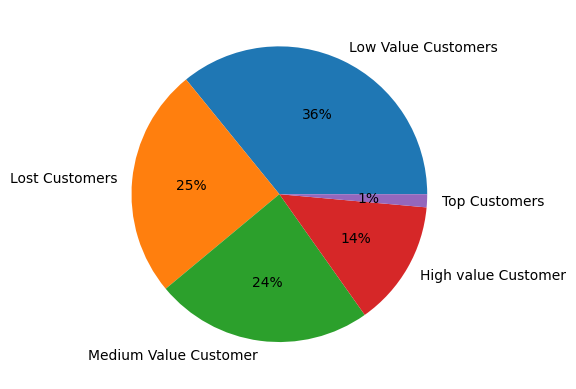

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

Through the RFM Model analysis, we found out that there are 14% customers are High Value Customers and 1% top customers. 36% of customers are low value customers. One thing to pay extra attention is that the business has a big portion of lost customers (25%). The total percentage of low value customers and lost customers are more than 60%, which shows the business has relatively low customer retention rate and not gaining high profits from its customer population.